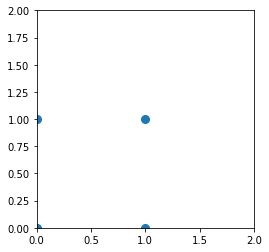

In [84]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
y = np.array([0, 0, 0, 1])
# bias trick
Xbar = np.concatenate((X, np.ones((1, 4))), axis=0)
plt.plot(X[0],X[1] , 'o', markersize=8)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim((0, 2))
plt.ylim((0, 2))

plt.show()

In [42]:
w_init = np.array([[0], [0.5], [1]])


(3, 1)

In [48]:
def sigmoid(s):
  return 1/(1 + np.exp(-s))
def loss(y, yhat):
  return -np.mean(y*np.log(yhat) + (1-y)*np.log(1-yhat))

yhat = sigmoid(w_init.T.dot(Xbar))
print(yhat)
print(loss(y, yhat))

[[0.73105858 0.81757448 0.73105858 0.81757448]]
1.1323374827504875


In [35]:

print(Xbar)

[[1. 1. 1. 1.]]
[[0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [1. 1. 1. 1.]]


In [76]:
def fit(w, X, y, alpha0, iters=5000, decay=1):
  for it in range(iters):
    #alpha = 1/(1+decay*(it+1))*alpha0
    z = w.T.dot(X)
    yhat = sigmoid(z)
    update = np.mean((yhat-y)*X, axis=1).reshape((3, 1))
    print('Iter: ', it+1, 'loss = ', loss(y, yhat), 'learning rate = ', alpha0, 'update = ', update)
    if np.linalg.norm(update) < 1e-4:
      break
    else:
      w = w - alpha0*update
  return w
ww = fit(w_init, Xbar, y, alpha0=0.5)

Iter:  1 loss =  1.1323374827504875 learning rate =  0.5 update =  [[0.13715826]
 [0.15878724]
 [0.52431653]]
Iter:  2 loss =  0.9831902240449825 learning rate =  0.5 update =  [[0.10242377]
 [0.12735192]
 [0.46181735]]
Iter:  3 loss =  0.8720273531481213 learning rate =  0.5 update =  [[0.06837007]
 [0.09533824]
 [0.40025868]]
Iter:  4 loss =  0.7917990512761588 learning rate =  0.5 update =  [[0.03791059]
 [0.06570817]
 [0.34426758]]
Iter:  5 loss =  0.7344388474205296 learning rate =  0.5 update =  [[0.01242312]
 [0.0401507 ]
 [0.29616382]]
Iter:  6 loss =  0.6929233254271219 learning rate =  0.5 update =  [[-0.00801292]
 [ 0.01909298]
 [ 0.25625711]]
Iter:  7 loss =  0.6620070550349542 learning rate =  0.5 update =  [[-0.023995  ]
 [ 0.00220529]
 [ 0.2237452 ]]
Iter:  8 loss =  0.6380921225973812 learning rate =  0.5 update =  [[-0.0363179 ]
 [-0.01113657]
 [ 0.19744485]]
Iter:  9 loss =  0.6188150272109664 learning rate =  0.5 update =  [[-0.0457349 ]
 [-0.02158953]
 [ 0.17618132]

In [77]:
print(ww)

[[  9.27145888]
 [  9.27145888]
 [-14.07712714]]


In [98]:
s = ww[2]/ww[1]
s = float(s)
print(s)

-1.5183292421427312


In [99]:
xs = [x / 100.0 for x in range(0, 200)]
ys = [-x - s for x in xs]
print(ys)
print(xs)

[1.5183292421427312, 1.5083292421427312, 1.4983292421427312, 1.4883292421427312, 1.4783292421427312, 1.4683292421427312, 1.4583292421427312, 1.4483292421427312, 1.4383292421427312, 1.4283292421427312, 1.4183292421427312, 1.4083292421427311, 1.3983292421427311, 1.3883292421427313, 1.3783292421427311, 1.3683292421427313, 1.3583292421427313, 1.3483292421427313, 1.3383292421427313, 1.3283292421427313, 1.3183292421427313, 1.3083292421427313, 1.2983292421427313, 1.2883292421427313, 1.2783292421427312, 1.2683292421427312, 1.2583292421427312, 1.2483292421427312, 1.2383292421427312, 1.2283292421427312, 1.2183292421427312, 1.2083292421427312, 1.1983292421427312, 1.1883292421427312, 1.1783292421427312, 1.1683292421427312, 1.1583292421427314, 1.1483292421427311, 1.1383292421427313, 1.1283292421427311, 1.1183292421427313, 1.1083292421427313, 1.0983292421427313, 1.0883292421427313, 1.0783292421427313, 1.0683292421427313, 1.0583292421427313, 1.0483292421427313, 1.0383292421427313, 1.0283292421427312,

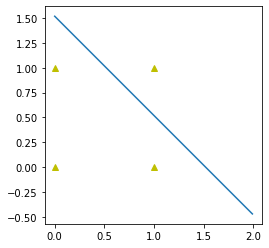

In [104]:
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(xs, ys)
plt.plot(X[0], X[1], 'y^')